In [2]:
import pandas as pd
iris=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

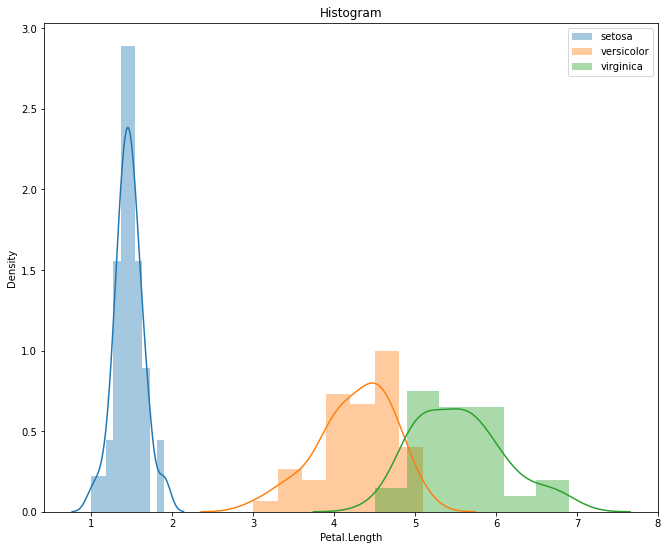

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(iris.loc[iris['Species']=='setosa','Petal.Length'], ax=ax, label='setosa')
sns.distplot(iris.loc[iris['Species']=='versicolor','Petal.Length'], ax=ax, label='versicolor')
sns.distplot(iris.loc[iris['Species']=='virginica','Petal.Length'], ax=ax, label='virginica')
plt.title('Histogram');
plt.legend()

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
y=iris['Petal.Length']
results=ols('y~C(Species)',data=iris).fit()
sm.stats.anova_lm(results,typ=2)
# 결론 : 유의확률이 <0.001이므로 품종간 꽃잎길이의 차이는 유의하다.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(Species),437.1028,2.0,1180.161182,2.856777e-91
Residual,27.2226,147.0,NaN,NaN


In [20]:
# 실습1 : 품종 간 꽃잎 길이의 평균과 표준편차를 구하시오 (오태훈 가점 획득)
iris.pivot_table(index="Species", values="Petal.Length", aggfunc={"mean", 'std'})

,mean,std
Species,,
setosa,1.462,0.173664
versicolor,4.260,0.469911
virginica,5.552,0.551895


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(iris['Petal.Length'],iris['Species'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798 0.001 2.5942 3.0018   True
    setosa  virginica     4.09 0.001 3.8862 4.2938   True
versicolor  virginica    1.292 0.001 1.0882 1.4958   True
---------------------------------------------------------


In [25]:
import pandas as pd

In [29]:
# 실습2 : 계단 높이에 따라서 운동의 심박수 차이가 있는지 유의수준 5% 내에서 검정하시오
df = pd.read_excel("/content/drive/MyDrive/통계학개론_오태훈/실습/sm_data.xlsx",
                     sheet_name='heart')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height     30 non-null     int64
 1   Frequency  30 non-null     int64
 2   RestHR     30 non-null     int64
 3   HR         30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
y=df['HR']
results=ols('y~C(Height)',data=df).fit()
sm.stats.anova_lm(results,typ=2)

# 결론 : 유의확률 0.002로 유의수준이 0.05보다 낮으므로 계단 높이에 따라서 운동의 심박수 차이는 유의하다.

,sum_sq,df,F,PR(>F)
C(Height),3499.2,1.0,11.363674,0.002201
Residual,8622.0,28.0,NaN,NaN


In [42]:
df.pivot_table(index="Frequency", values="HR", aggfunc={"mean", 'std'})
#계단 높이 1이 심박수 118.2로 계단높이 0보다 더 높다.

,mean,std
Frequency,,
0,95.7,12.605554
1,104.1,18.441800
2,122.4,20.823064


In [40]:
# 실습3 : 운동 횟수에 따라서 운동의 심박수 차이가 있는지 유의수준 5% 내에서 알아보고
# 언제가 가장 심박수가 높은지 다중비교 분석하시오
import statsmodels.api as sm
from statsmodels.formula.api import ols
y=df['HR']
results=ols('y~C(Frequency)',data=df).fit()
sm.stats.anova_lm(results,typ=2)
# 결론 : 유의확률이 0.007로 유의수즌 0.05보다 낮으므로 귀무가설 기각, 운동횟수에 따라서 심박수 차이는 유의하다.

,sum_sq,df,F,PR(>F)
C(Frequency),3727.8,2.0,5.995818,0.007003
Residual,8393.4,27.0,NaN,NaN


In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['HR'],df['Frequency'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1      8.4 0.5422 -11.1466 27.9466  False
     0      2     26.7  0.006   7.1534 46.2466   True
     1      2     18.3 0.0698  -1.2466 37.8466  False
-----------------------------------------------------


#실습4 엑셀에다 옮기기

In [65]:
bank = pd.read_excel("/content/drive/MyDrive/통계학개론_오태훈/실습/sm_data.xlsx",
                     sheet_name='bank')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    1053 non-null   int64  
 1   B_type    1053 non-null   int64  
 2   Sales     1053 non-null   int64  
 3   Age       1053 non-null   int64  
 4   Interest  1053 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 41.3 KB


In [67]:
bank.pivot_table(index="B_type", values="Interest", aggfunc={"mean", 'std'})

,mean,std
B_type,,
1,1.416632,0.641470
2,1.211395,0.683047
3,1.285336,0.671709


In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
y=bank['Interest']
results=ols('y~C(B_type)+C(Gender)+Sales+C(B_type)*Sales+C(Gender)*Sales',data=bank).fit()
sm.stats.anova_lm(results,typ=2)

,sum_sq,df,F,PR(>F)
C(B_type),1.669805,2.0,2.011565,1.342969e-01
C(Gender),0.062027,1.0,0.149445,6.991448e-01
Sales,26.776500,1.0,64.513693,2.570304e-15
C(B_type):Sales,0.989724,2.0,1.192291,3.039377e-01
C(Gender):Sales,0.123598,1.0,0.297789,5.853885e-01
Residual,433.728740,1045.0,NaN,NaN


In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     21.73
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.03e-17
Time:                        08:22:19   Log-Likelihood:                -1028.5
No. Observations:                1053   AIC:                             2067.
Df Residuals:                    1048   BIC:                             2092.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8579      0.079     23.606      0.000       1.703       2.012
C(B_type)[T.2]    -0.1645      0.084     -1.967      0.049      -0.329      -0.000
C(B_type)[T.3]    -0.0727      0.052     -1.388      0.165      -0.175       0.030
C(Gender)[T.2]     0.0300      0.077      0.393      0.695      -0.120       0.180
Sales             -0.0005   5.71e-05     -8.033      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       18.676   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.375
Skew:                           0.079   Prob(JB):                      0.00339
Kurtosis:                       2.516   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
bank.pivot_table(index="B_type", values="Sales", aggfunc={"mean", 'std'})

,mean,std
B_type,,
1,1017.062176,407.646595
2,1108.686047,388.388958
3,1150.370801,389.479330


In [74]:
y=bank['Interest']
results=ols('y~C(B_type)+C(Gender)+Sales+C(B_type)*Sales+C(Gender)*Sales',data=bank).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     12.79
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.78e-16
Time:                        08:34:54   Log-Likelihood:                -1027.1
No. Observations:                1053   AIC:                             2070.
Df Residuals:                    1045   BIC:                             2110.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8610      0.182     10.229      0.000       1.504       2.218
C(B_type)[T.2]           0.1901      0.246      0.773      0.440      -0.292       0.672
C(B_type)[T.3]          -0.0060      0.147     -0.041      0.967      -0.294       0.282
C(Gender)[T.2]          -0.0569      0.177     -0.322      0.748      -0.404       0.290
Sales                   -0.0005      0.000     -1.917      0.055      -0.001    1.23e-05
C(B_type)[T.2]:Sales    -0.0003      0.000     -1.523      0.128      -0.001    9.37e-05
C(B_type)[T.3]:Sales -6.534e-05      0.000     -0.500      0.617      -0.000       0.000
C(Gender)[T.2]:Sales     0.0001      0.000      0.546      0.585      -0.000       0.001
==============================================================================
Omnibus:                       16.720   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.469
Skew:                           0.075   Prob(JB):                      0.00533
Kurtosis:                       2.535   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 실습 5번 
엑셀에 있음